# Machine Learning - Linear Regression
This project will work on how to predict the prices of homes based on the properties of the house. I will determine which house affected the final sale price and how effectively we can predict the sale price.Here's a brief description of the columns in the data:

## Learning Objectives

By the end of this notebook, the reader should be able to perform Linear Regression techniques in python. This includes:

1. Importing and formating data
2. Training the LinearRegression model from the `sklearn.linear_model` library
3. Work with qualitative and quantitative data, and effectively deal with instances of categorical data.
4. Analyze and determine proper handling of redundant and/or inconsistent data features.
5. Create a heatmap visual with `matplot.lib` library

## Read Data

   The `pandas` library is an open source data analytics tool for python that allows the use of 'data frame' objects and clean file parsing.
   
   Here we split the Ames housing data into training and testing data. The dataset contains 82 columns which are known as features of the data. Here are a few:
   
- Lot Area: Lot size in square feet.
- Overall Qual: Rates the overall material and finish of the house.
- Overall Cond: Rates the overall condition of the house.
- Year Built: Original construction date.
- Low Qual Fin SF: Low quality finished square feet (all floors).
- Full Bath: Full bathrooms above grade.
- Fireplaces: Number of fireplaces.

and so on.

### <font color=blue>Exercise 1</font>
 1. The python `pandas` library has a `.read_csv()` function to import text file data. The documentation can be found [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#csv-text-files). Use the function to import AmesHousing.txt from the Data folder. The delimiter in use is tabs (`'t'`) You can view the datas size and features  with `data.info()`. 
 2. We will be using this data to both train and test our model. Use python splicing(`array[0:n]`) to create train and test datasets. The two should be even in size +/- 1.

In [2]:
import pandas as pd
#data = Insert Code Here
#train = Insert Code Here
#test = Insert Code Here
target = 'SalePrice'

## Use linear regression to model the data

`numpy` is another powerful open source data structure library used for scientific computing. Think of it as stronger and more layered implememtations of python lists and N-dimension lists. 

`LinearRegression` creates a line of best fit with data. You can find more details [here](https://scikit-learn.org/stable/modules/linear_model.html) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

### <font color=blue>Exercise 2</font>

We have created a LinearRegression object to model a fit linear model. 

1. Train the object `lr` with our training data for 'Gr Liv Area', and our target data being 'SalePrice' with the `fit()` function.
2. One you train your model, you can use it to make predictions with the `predict()` method.
3. Use `mean_squared_error` function to calculate your distance between predicted sales price and actual sales price. Compare your predictions for the training data and test data. Dont forget to take the square root for cleaner results.

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# Insert code here

from sklearn.metrics import mean_squared_error
train_predictions = #Insert Code Here
test_predictions = #Insert Code Here

train_mse = #Insert Code Here
test_mse = #Insert Code Here

#Insert Code Here

NameError: name 'train' is not defined

## Use Multiple Regression to model the data

### <font color=blue>Exercise 2.1</font>

You can also make predictions with multiple feature dimensions. Perform Exercise 2 with the 2 features in `cols`. Compare your results to the previous 1-Dimensional trained fit.

In [7]:
cols = ['Overall Cond', 'Gr Liv Area']
#Insert Code Here
train_predictions_2 = #Insert Code Here
test_predictions_2 = #Insert Code Here

#Insert Code Here

56032.398015258674
57066.90779448559


## Handling data types with missing values/non-numeric values
In the machine learning workflow, once we've selected the model we want to use, selecting the appropriate features for that model is the next important step. In the following code snippets, we will explore how to use correlation between features and the target column, correlation between features, and variance of features to select features.

We will specifically focus on selecting from feature columns that don't have any missing values or don't need to be transformed to be useful (e.g. columns like Year Built and Year Remod/Add). 

In [8]:
numerical_train = train.select_dtypes(include=['int64', 'float'])
numerical_train = numerical_train.drop(['PID', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold'], axis=1)
null_series = numerical_train.isnull().sum()
full_cols_series = null_series[null_series == 0]
print(full_cols_series)

Order              0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
SalePrice          0
dtype: int64


## Correlating feature columns with Target Columns

Now that we have selected features of strict numeric value, let's implement some `pandas.dataframe` functionality to find strong correlating data.

### <font color=blue>Exercise 3</font>
1. Create a subset of the training data using the indecies of full_cols_series. These can be retreieved with `.index`.
2. Data frames also have a function called .corr() which calculates pairwise correlations. Create a correlation matrix of the subset
3. To make the results easier to see, you can clean up the data with the built in `.abs()` function and `.sort_values()` function.

In [9]:
train_subset = #Insert Code Here
corrmat = #Insert Code Here
sorted_corrs = #Insert Code Here
#Insert Code Here

Misc Val           0.009903
3Ssn Porch         0.038699
Low Qual Fin SF    0.060352
Order              0.068181
MS SubClass        0.088504
Overall Cond       0.099395
Screen Porch       0.100121
Bedroom AbvGr      0.106941
Kitchen AbvGr      0.130843
Pool Area          0.145474
Enclosed Porch     0.165873
2nd Flr SF         0.202352
Half Bath          0.272870
Lot Area           0.274730
Wood Deck SF       0.319104
Open Porch SF      0.344383
TotRms AbvGrd      0.483701
Fireplaces         0.485683
Full Bath          0.518194
1st Flr SF         0.657119
Garage Area        0.662397
Garage Cars        0.663485
Gr Liv Area        0.698990
Overall Qual       0.804562
SalePrice          1.000000
Name: SalePrice, dtype: float64


## Correlation Matrix Heatmap
We now have a decent list of candidate features to use in our model, sorted by how strongly they're correlated with the SalePrice column. For now, I will keep only the features that have a correlation of 0.3 or higher. This cutoff is a bit arbitrary and, in general, it's a good idea to experiment with this cutoff. For example, you can train and test models using the columns selected using different cutoffs and see where your model stops improving.

### <font color=blue>Exercise 4</font>
`plt.figure()` sets a frame for the heatmap you will create. 
1. Create a data frame with the values of sorted correlation values > .3.
2. Create a new correlation matrix with the train_subset, this time with the strongly correlated values
3. The seaborn library allows for powerful and simple data visualization. Use the [heatmap function](https://seaborn.pydata.org/generated/seaborn.heatmap.html) with your new correlation matrix to create a new heatmap object. Calling the object on a new line should print a heatmap.
4. High correlation of 2 features that don't include your target is called colinearity. Having colinear features can negatively impact accuracy in your predictions. Use the heatmap to point out 2 examples of strong colinearity.

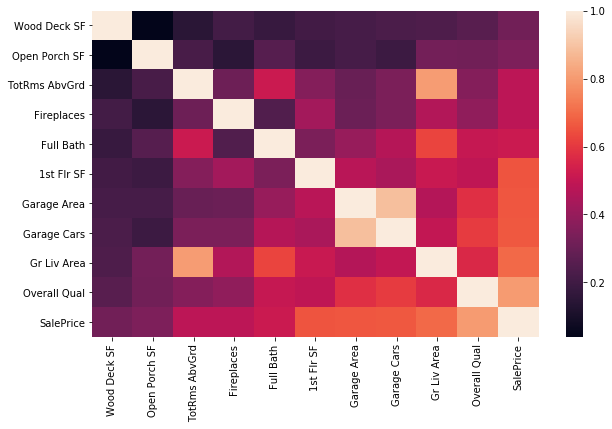

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,6))
#Insert Code Here

## Train and Test the model
Use the `drop([])` function for data frames to remove one of each pair of colinear features you found in the previous model, as well as 'SalePrice' from your last correlation matrix.


Based on the correlation matrix heatmap, we can tell that the following pairs of columns are strongly correlated:

- Gr Liv Area and TotRms AbvGrd
- Garage Area and Garage Cars

We will only use one of these pairs and remove any columns with missing values


In [22]:
final_corr_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd'])
features = final_corr_cols.drop(['SalePrice']).index
target = 'SalePrice'
clean_test = test[final_corr_cols.index].dropna()

lr = LinearRegression()
lr.fit(train[features], train['SalePrice'])

train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

34173.97629185851
41032.026120197705


## Removing low variance features
The last technique I will explore is removing features with low variance. When the values in a feature column have low variance, they don't meaningfully contribute to the model's predictive capability. On the extreme end, let's imagine a column with a variance of 0. This would mean that all of the values in that column were exactly the same. This means that the column isn't informative and isn't going to help the model make better predictions.

To make apples to apples comparisions between columns, we need to standardize all of the columns to vary between 0 and 1. Then, we can set a cutoff value for variance and remove features that have less than that variance amount.

In [14]:
unit_train = train[features]/(train[features].max())
sorted_vars = unit_train.var().sort_values()
print(sorted_vars)

Open Porch SF    0.013938
Gr Liv Area      0.018014
Full Bath        0.018621
1st Flr SF       0.019182
Overall Qual     0.019842
Garage Area      0.020347
Wood Deck SF     0.033064
Fireplaces       0.046589
dtype: float64


## Final Model
Let's set a cutoff variance of 0.015, remove the Open Porch SF feature, and train and test a model using the remaining features.

In [15]:

features = features.drop(['Open Porch SF'])

clean_test = test[final_corr_cols.index].dropna()

lr = LinearRegression()
lr.fit(train[features], train['SalePrice'])

train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])

train_rmse_2 = np.sqrt(train_mse)
test_rmse_2 = np.sqrt(test_mse)

print(train_rmse_2)
print(test_rmse_2)

34372.696707783965
40591.427024377204


## Feature transformation
To understand how linear regression works, I have stuck to using features from the training dataset that contained no missing values and were already in a convenient numeric representation. In this mission, we'll explore how to transform some of the the remaining features so we can use them in our model. Broadly, the process of processing and creating new features is known as feature engineering.


In [16]:
train = data[0:1460]
test = data[1460:]
train_null_counts = train.isnull().sum()
df_no_mv = train[train_null_counts[train_null_counts==0].index]

## Categorical Features
You'll notice that some of the columns in the data frame df_no_mv contain string values. To use these features in our model, we need to transform them into numerical representations

In [17]:
text_cols = df_no_mv.select_dtypes(include=['object']).columns

for col in text_cols:
    print(col+":", len(train[col].unique()))
for col in text_cols:
    train[col] = train[col].astype('category')
train['Utilities'].cat.codes.value_counts()

MS Zoning: 6
Street: 2
Lot Shape: 4
Land Contour: 4
Utilities: 3
Lot Config: 5
Land Slope: 3
Neighborhood: 26
Condition 1: 9
Condition 2: 6
Bldg Type: 5
House Style: 8
Roof Style: 6
Roof Matl: 5
Exterior 1st: 14
Exterior 2nd: 16
Exter Qual: 4
Exter Cond: 5
Foundation: 6
Heating: 6
Heating QC: 4
Central Air: 2
Electrical: 4
Kitchen Qual: 5
Functional: 7
Paved Drive: 3
Sale Type: 9
Sale Condition: 5


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    1457
2       2
1       1
dtype: int64

## Dummy Coding
When we convert a column to the categorical data type, pandas assigns a number from 0 to n-1 (where n is the number of unique values in a column) for each value. The drawback with this approach is that one of the assumptions of linear regression is violated here. Linear regression operates under the assumption that the features are linearly correlated with the target column. For a categorical feature, however, there's no actual numerical meaning to the categorical codes that pandas assigned for that colum. An increase in the Utilities column from 1 to 2 has no correlation value with the target column, and the categorical codes are instead used for uniqueness and exclusivity (the category associated with 0 is different than the one associated with 1).

The common solution is to use a technique called dummy coding


In [18]:
dummy_cols = pd.DataFrame()
for col in text_cols:
    col_dummies = pd.get_dummies(train[col])
    train = pd.concat([train, col_dummies], axis=1)
    del train[col]

In [19]:
train['years_until_remod'] = train['Year Remod/Add'] - train['Year Built']

## Missing Values
Now I will focus on handling columns with missing values. When values are missing in a column, there are two main approaches we can take:

- Remove rows containing missing values for specific columns
Pro: Rows containing missing values are removed, leaving only clean data for modeling
Con: Entire observations from the training set are removed, which can reduce overall prediction accuracy
- Impute (or replace) missing values using a descriptive statistic from the column
Pro: Missing values are replaced with potentially similar estimates, preserving the rest of the observation in the model.
Con: Depending on the approach, we may be adding noisy data for the model to learn

Given that we only have 1460 training examples (with ~80 potentially useful features), we don't want to remove any of these rows from the dataset. Let's instead focus on imputation techniques.

We'll focus on columns that contain at least 1 missing value but less than 365 missing values (or 25% of the number of rows in the training set). There's no strict threshold, and many people instead use a 50% cutoff (if half the values in a column are missing, it's automatically dropped). Having some domain knowledge can help with determining an acceptable cutoff value.

In [20]:
df_missing_values = train[train_null_counts[(train_null_counts>0) & (train_null_counts<584)].index]

print(df_missing_values.isnull().sum())
print(df_missing_values.dtypes)

Lot Frontage      249
Mas Vnr Type       11
Mas Vnr Area       11
Bsmt Qual          40
Bsmt Cond          40
Bsmt Exposure      41
BsmtFin Type 1     40
BsmtFin SF 1        1
BsmtFin Type 2     41
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      1
Bsmt Half Bath      1
Garage Type        74
Garage Yr Blt      75
Garage Finish      75
Garage Qual        75
Garage Cond        75
dtype: int64
Lot Frontage      float64
Mas Vnr Type       object
Mas Vnr Area      float64
Bsmt Qual          object
Bsmt Cond          object
Bsmt Exposure      object
BsmtFin Type 1     object
BsmtFin SF 1      float64
BsmtFin Type 2     object
BsmtFin SF 2      float64
Bsmt Unf SF       float64
Total Bsmt SF     float64
Bsmt Full Bath    float64
Bsmt Half Bath    float64
Garage Type        object
Garage Yr Blt     float64
Garage Finish      object
Garage Qual        object
Garage Cond        object
dtype: object


## Inputing missing values
It looks like about half of the columns in df_missing_values are string columns (object data type), while about half are float64 columns. For numerical columns with missing values, a common strategy is to compute the mean, median, or mode of each column and replace all missing values in that column with that value

In [21]:
float_cols = df_missing_values.select_dtypes(include=['float'])
float_cols = float_cols.fillna(df_missing_values.mean())
print(float_cols.isnull().sum())

Lot Frontage      0
Mas Vnr Area      0
BsmtFin SF 1      0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Bsmt Full Bath    0
Bsmt Half Bath    0
Garage Yr Blt     0
dtype: int64


## Conclusion
This concludes the project where we underook applying a linear regression model and handled missing values and non-numeric variables.